In [1]:
import pandas as pd
df = pd.read_csv("../data/eda_b4s_clean.csv")
#head der bereinigten Daten anzeigen
df.head(5)  # Ausgabe der ersten Zeilen des bereinigten Data

,time,1-1:1290*255,1-1:2290*255,1-1:5290*255,1-1:6290*255,1-1:7290*255,1-1:8290*255,Nettolast_P_kW,Nettolast_Q_kvar,dkl010h0,fkl010h0,fkl010h1,gre000h0,rre150h0,tre200h0,hour,weekday,is_weekend,Holiday
0,2020-03-02 23:15:00,30014,0,2612,0,0,8200,30.014,-5.588,244.0,5.925,11.6,0.0,0.100,3.450,23,0,0,0
1,2020-03-02 23:30:00,27356,0,2538,0,0,8322,27.356,-5.784,244.0,5.700,11.6,0.0,0.100,3.300,23,0,0,0
2,2020-03-02 23:45:00,25930,0,2544,0,0,8302,25.930,-5.758,245.0,5.750,11.6,0.0,0.100,3.275,23,0,0,0
3,2020-03-03 00:00:00,24318,0,2432,0,0,8296,24.318,-5.864,245.0,5.800,11.6,0.0,0.100,3.250,0,1,0,0
4,2020-03-03 00:15:00,24300,0,2460,0,0,8082,24.300,-5.622,245.0,5.850,11.9,0.0,0.025,3.225,0,1,0,0


In [2]:
print(df.shape)
print(df.columns)
df.info()
df.describe()


(26746, 19)
Index(['time', '1-1:1290*255', '1-1:2290*255', '1-1:5290*255', '1-1:6290*255',
       '1-1:7290*255', '1-1:8290*255', 'Nettolast_P_kW', 'Nettolast_Q_kvar',
       'dkl010h0', 'fkl010h0', 'fkl010h1', 'gre000h0', 'rre150h0', 'tre200h0',
       'hour', 'weekday', 'is_weekend', 'Holiday'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26746 entries, 0 to 26745
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   time              26746 non-null  object 
 1   1-1:1290*255      26746 non-null  int64  
 2   1-1:2290*255      26746 non-null  int64  
 3   1-1:5290*255      26746 non-null  int64  
 4   1-1:6290*255      26746 non-null  int64  
 5   1-1:7290*255      26746 non-null  int64  
 6   1-1:8290*255      26746 non-null  int64  
 7   Nettolast_P_kW    26746 non-null  float64
 8   Nettolast_Q_kvar  26746 non-null  float64
 9   dkl010h0          26746 non-null  float64
 10  f

,1-1:1290*255,1-1:2290*255,1-1:5290*255,1-1:6290*255,1-1:7290*255,1-1:8290*255,Nettolast_P_kW,Nettolast_Q_kvar,dkl010h0,fkl010h0,fkl010h1,gre000h0,rre150h0,tre200h0,hour,weekday,is_weekend,Holiday
count,26746.000000,26746.000000,26746.00000,26746.000000,26746.000000,26746.000000,26746.000000,26746.000000,26746.000000,26746.000000,26746.000000,26746.000000,26746.000000,26746.000000,26746.000000,26746.000000,26746.000000,26746.000000
mean,60051.850669,8258.695282,3101.65879,203.765797,0.009572,17572.863606,51.793155,-14.267449,154.339864,1.957316,4.789004,177.096482,0.024490,13.126524,11.492672,3.005833,0.285613,0.021536
std,20454.507049,12450.709470,1247.70645,200.107347,0.280849,2241.068935,21.651203,2.311652,100.387433,1.372922,3.193544,258.472171,0.130408,6.982034,6.920976,1.993756,0.451714,0.145165
min,6972.000000,0.000000,8.00000,0.000000,0.000000,4208.000000,-29.590000,-29.572000,0.000000,0.100000,0.400000,0.000000,0.000000,-3.400000,0.000000,0.000000,0.000000,0.000000
25%,45384.000000,0.000000,2056.00000,0.000000,0.000000,16736.000000,34.313000,-15.600000,50.000000,0.925000,2.400000,0.000000,0.000000,8.050000,5.000000,1.000000,0.000000,0.000000
50%,61212.000000,480.000000,2686.00000,240.000000,0.000000,17596.000000,48.784000,-14.600000,171.000000,1.650000,4.100000,22.000000,0.000000,13.100000,11.000000,3.000000,0.000000,0.000000
75%,73960.000000,12960.000000,4408.00000,360.000000,0.000000,18663.000000,66.271000,-13.144000,238.000000,2.618750,6.400000,286.937500,0.000000,18.200000,17.000000,5.000000,1.000000,0.000000
max,137836.000000,51840.000000,16112.00000,600.000000,16.000000,33580.000000,137.836000,-0.444000,360.000000,11.000000,23.100000,1003.000000,3.925000,33.300000,23.000000,6.000000,1.000000,1.000000


In [7]:
# Ausreißer anhand des IQR entfernen
Q1 = df["Nettolast_P_kW"].quantile(0.25)
Q3 = df["Nettolast_P_kW"].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df_no_outliers = df[(df["Nettolast_P_kW"] >= lower) & (df["Nettolast_P_kW"] <= upper)]
print(df_no_outliers.shape)


(26666, 19)


In [8]:
# Anzahl der verbleibenden Daten nach dem Entfernen der Ausreißer
print(f"Anzahl der verbleibenden Datenpunkte: {len(df_no_outliers)}")
print(f"Anteil der verbleibenden Daten: {len(df_no_outliers) / len(df) * 100:.2f}%")

Anzahl der verbleibenden Datenpunkte: 26666
Anteil der verbleibenden Daten: 99.70%


In [15]:
# Anzahl der gelöschten Datenpunkte berechnen
deleted_count = len(df) - len(df_no_outliers)
deleted_percentage = deleted_count / len(df) * 100

print(f"Anzahl der gelöschten Datenpunkte: {deleted_count}")
print(f"Anteil der gelöschten Daten: {deleted_percentage:.2f}%")

Anzahl der gelöschten Datenpunkte: 0
Anteil der gelöschten Daten: 0.00%


In [10]:

df = df_no_outliers

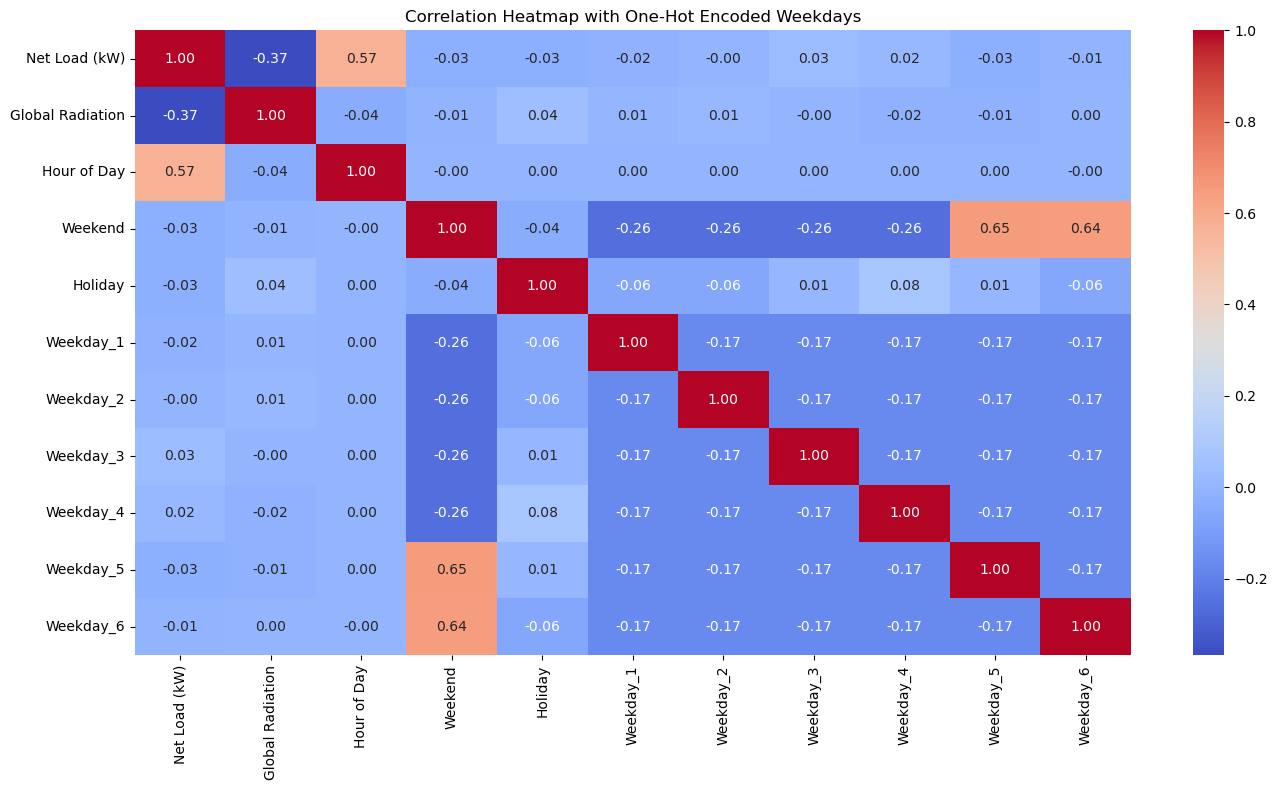

In [17]:
# Nach Kernel-Reset: Daten erneut laden
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# CSV-Datei erneut laden
df = pd.read_csv("../data/eda_b4s_clean.csv", parse_dates=["time"], index_col="time")

# Sicherstellen, dass die relevanten Spalten vorhanden sind
required_columns = ['Nettolast_P_kW', 'gre000h0', 'hour', 'weekday', 'is_weekend', 'Holiday']
df_model = df[required_columns].copy()

# Spalten umbenennen für Lesbarkeit
df_model = df_model.rename(columns={
    'Nettolast_P_kW': 'Net Load (kW)',
    'gre000h0': 'Global Radiation',
    'hour': 'Hour of Day',
    'weekday': 'Weekday',
    'is_weekend': 'Weekend'
})

# One-Hot-Encoding für den Wochentag (Weekday)
df_encoded = pd.get_dummies(df_model, columns=['Weekday'], drop_first=True)

# Korrelationsmatrix berechnen
correlation_matrix = df_encoded.corr()

# Heatmap zeichnen
plt.figure(figsize=(14, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap with One-Hot Encoded Weekdays")
plt.tight_layout()
plt.show()


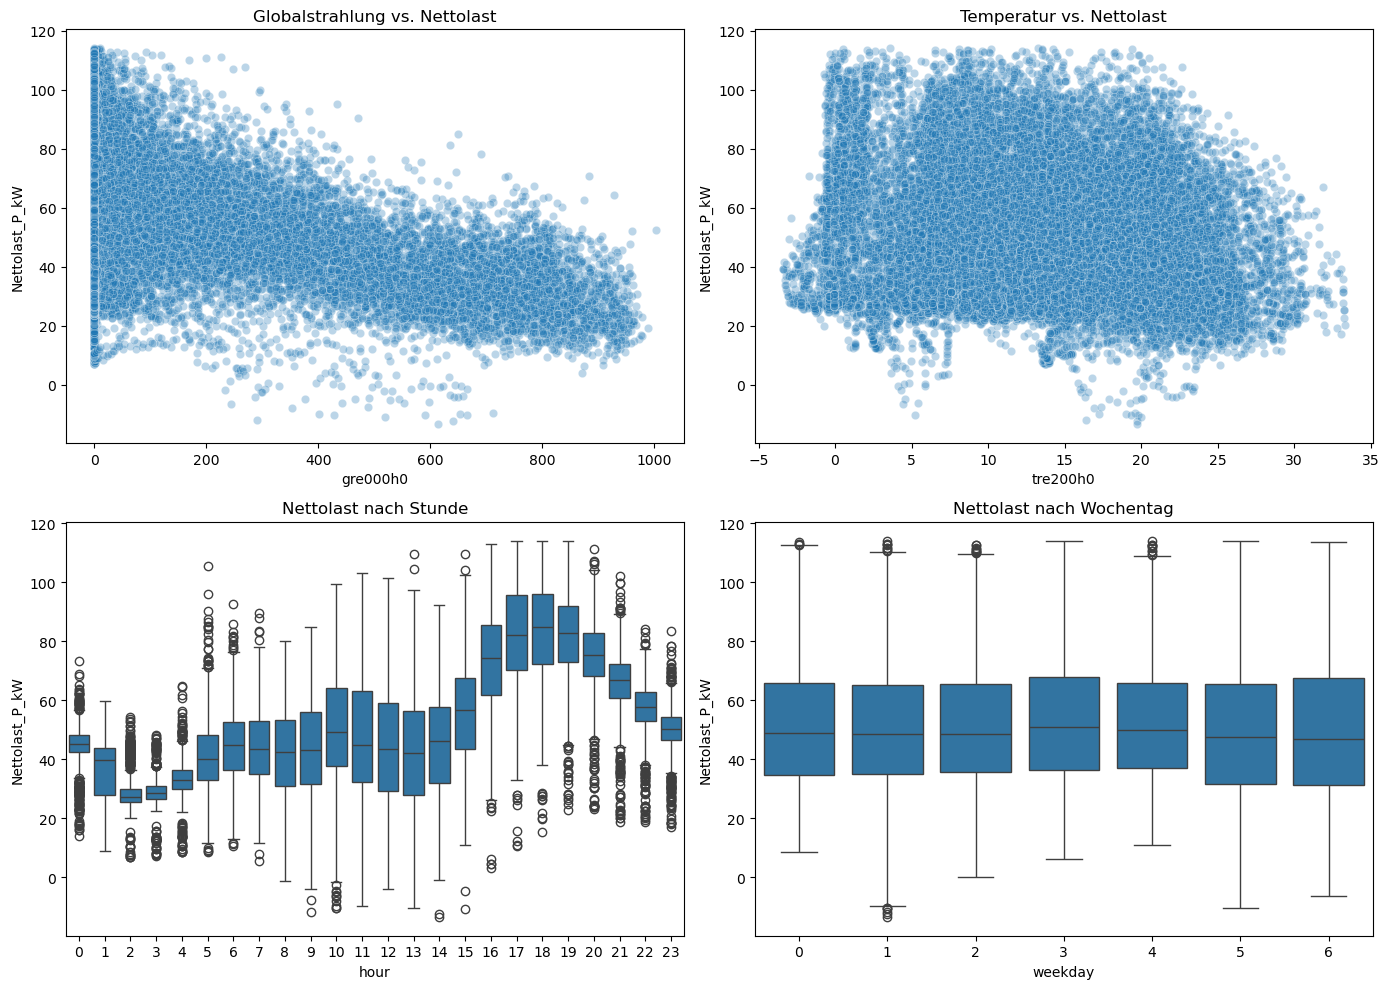

In [12]:
import seaborn as sns

import matplotlib.pyplot as plt

# Einfluss der Wetterdaten auf die Last
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
sns.scatterplot(ax=axes[0, 0], data=df, x="gre000h0", y="Nettolast_P_kW", alpha=0.3)
axes[0, 0].set_title("Globalstrahlung vs. Nettolast")

sns.scatterplot(ax=axes[0, 1], data=df, x="tre200h0", y="Nettolast_P_kW", alpha=0.3)
axes[0, 1].set_title("Temperatur vs. Nettolast")

sns.boxplot(ax=axes[1, 0], data=df, x="hour", y="Nettolast_P_kW")
axes[1, 0].set_title("Nettolast nach Stunde")

sns.boxplot(ax=axes[1, 1], data=df, x="weekday", y="Nettolast_P_kW")
axes[1, 1].set_title("Nettolast nach Wochentag")

plt.tight_layout()
plt.show()

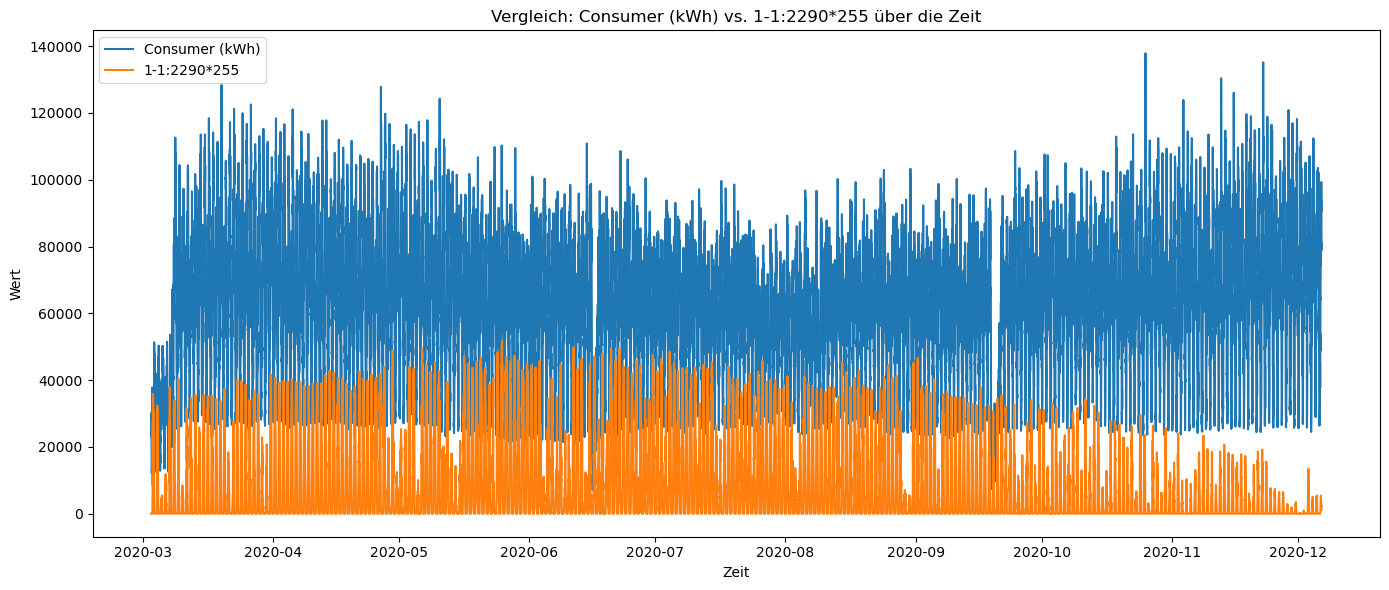

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(df['time'], df.iloc[:, 1], label=df.columns[1])  # Zweite Spalte
plt.plot(df['time'], df.iloc[:, 2], label=df.columns[2])  # Dritte Spalte
plt.xlabel('Zeit')
plt.ylabel('Wert')
plt.title(f'Vergleich: {df.columns[1]} vs. {df.columns[2]} über die Zeit')
plt.legend()
plt.tight_layout()
plt.show()

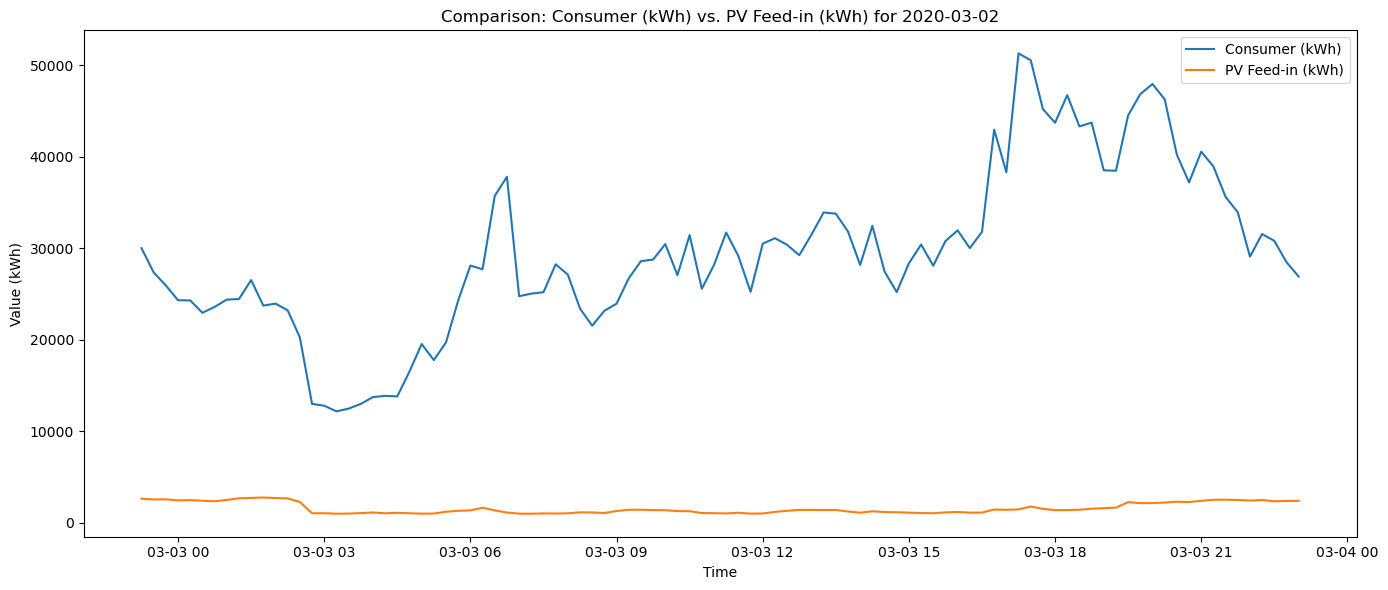

In [23]:
import matplotlib.pyplot as plt

# Plot comparison of the second column (Consumer) and third column (PV Feed-in) for one day
plt.figure(figsize=(14, 6))
plt.plot(df_day['time'], df_day.iloc[:, 1], label=df_day.columns[1])  # Consumer (kWh)
plt.plot(df_day['time'], df_day.iloc[:, 3], label=df_day.columns[3])  # PV Feed-in (kWh)
plt.xlabel('Time')
plt.ylabel('Value (kWh)')
plt.title(f'Comparison: {df_day.columns[1]} vs. {df_day.columns[3]} for {start_date.date()}')
plt.legend()
plt.tight_layout()
plt.show()

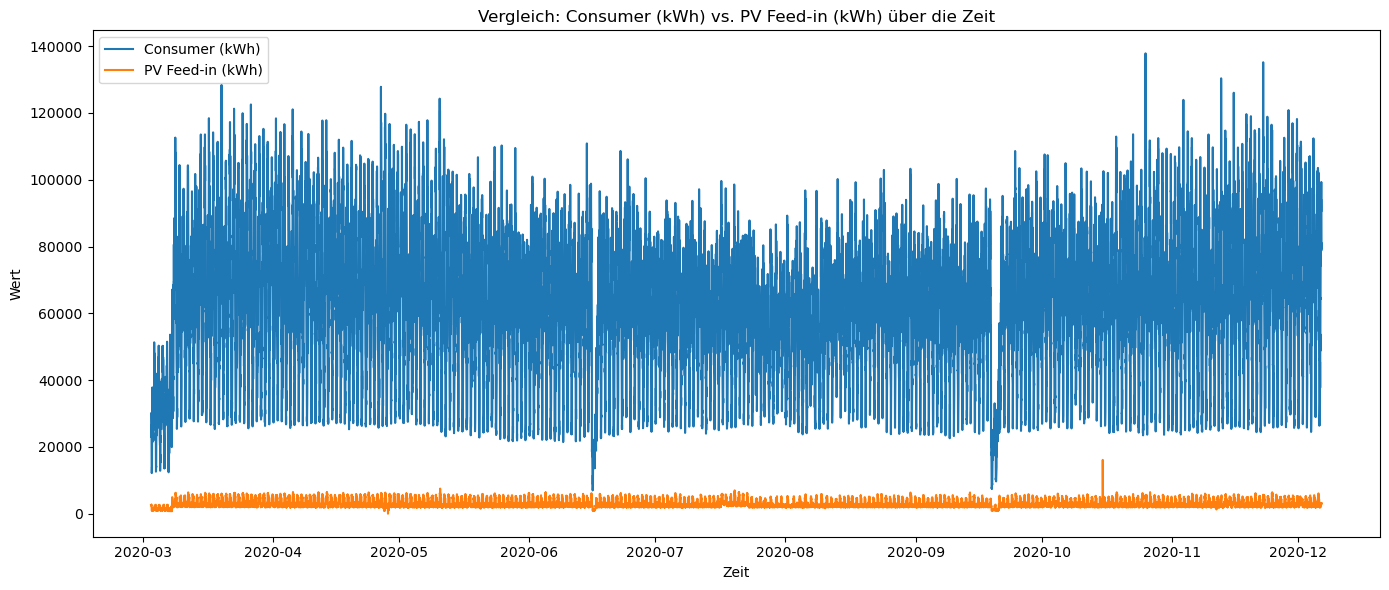

In [ ]:

import matplotlib.pyplot as plt
# Plot the second and third columns over time for comparison
plt.figure(figsize=(14, 6))
plt.plot(df['time'], df.iloc[:, 1], label=df.columns[1])  # Consumer (kWh)
plt.plot(df['time'], df.iloc[:, 2], label=df.columns[2])  # 1-1:2290*255
plt.xlabel('Time')
plt.ylabel('Value')
plt.title(f'Comparison: {df.columns[1]} vs. {df.columns[2]} over Time')
plt.legend()
plt.tight_layout()
plt.show()
df['time'] = pd.to_datetime(df['time'])

# Plot der zweiten und vierten Spalte über die Zeit
plt.figure(figsize=(14, 6))
plt.plot(df['time'], df.iloc[:, 1], label=df.columns[1])
plt.plot(df['time'], df.iloc[:, 3], label=df.columns[3])
plt.xlabel('Zeit')
plt.ylabel('Wert')
plt.title(f'Vergleich: {df.columns[1]} vs. {df.columns[3]} über die Zeit')
plt.legend()
plt.tight_layout()
plt.show()

TypeError: float() argument must be a string or a real number, not 'datetime.time'

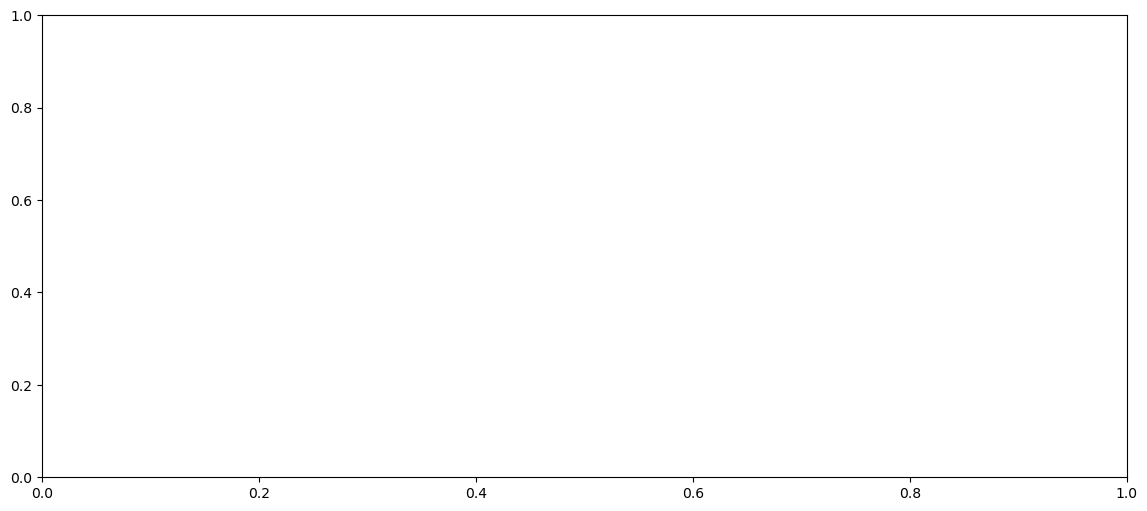

In [ ]:
# Plot-Vergleich NUR für einen Tag (df_day) – x-Achse: Uhrzeit
plt.figure(figsize=(14, 6))
plt.plot(df_day['time'].dt.time, df_day.iloc[:, 1], label=df_day.columns[1])  # Consumer (kWh)
plt.plot(df_day['time'].dt.time, df_day.iloc[:, 2], label=df_day.columns[2])  # 1-1:2290*255
plt.xlabel('Uhrzeit')
plt.ylabel('Value')
plt.title(f'Comparison: {df_day.columns[1]} vs. {df_day.columns[2]} für {start_date.date()}')
plt.legend()
plt.tight_layout()
plt.show()

# Plot der zweiten und vierten Spalte NUR für einen Tag – x-Achse: Uhrzeit
plt.figure(figsize=(14, 6))
plt.plot(df_day['time'].dt.time, df_day.iloc[:, 1], label=df_day.columns[1])
plt.plot(df_day['time'].dt.time, df_day.iloc[:, 3], label=df_day.columns[3])
plt.xlabel('Uhrzeit')
plt.ylabel('Wert')
plt.title(f'Vergleich: {df_day.columns[1]} vs. {df_day.columns[3]} am {start_date.date()}')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Der Code funktioniert nicht, weil er als R-Zelle (`r`) deklariert ist, aber Python-Code enthält.
# In Jupyter muss die Zelle als Python (`python`) markiert sein, damit Python-Code ausgeführt wird.
# Ändere die Zellen-Kennzeichnung von `r` zu `python`, dann funktioniert der Code.

import matplotlib.pyplot as plt

# Vergleicht die zweite und dritte Spalte für einen Tag (df_day)
plt.figure(figsize=(14, 6))
plt.plot(df_day['time_str'], df_day.iloc[:, 1], label=df_day.columns[1])  # Consumer (kWh)
plt.plot(df_day['time_str'], df_day.iloc[:, 2], label=df_day.columns[2])  # 1-1:2290*255
plt.xlabel('Uhrzeit')
plt.ylabel('Wert')
plt.title(f'Vergleich: {df_day.columns[1]} vs. {df_day.columns[2]} für {start_date.date()}')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

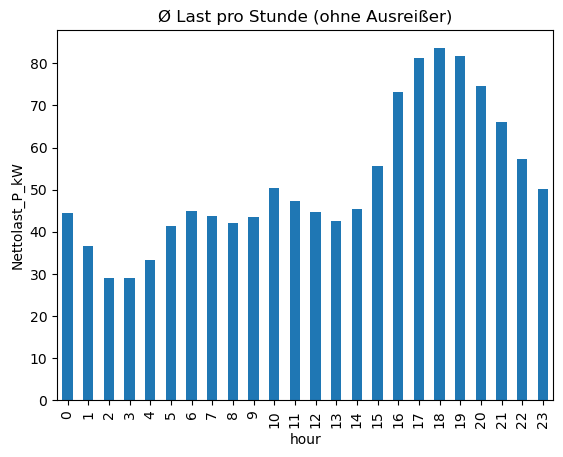

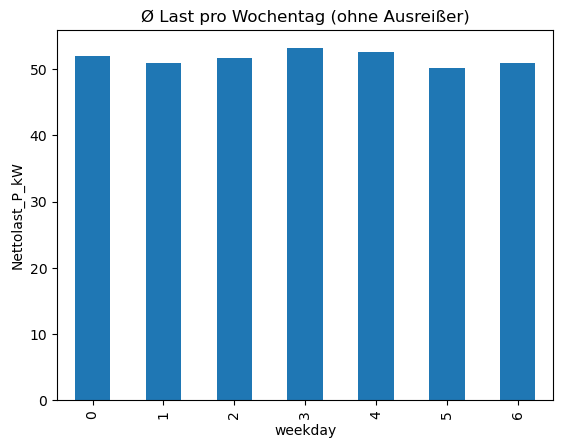

In [13]:
# Gruppieren nach Stunde und Mittelwert berechnen (ohne Ausreißer)
df_no_outliers.groupby("hour")["Nettolast_P_kW"].mean().plot(
    kind="bar", title="Ø Last pro Stunde (ohne Ausreißer)"
)
plt.ylabel("Nettolast_P_kW")
plt.show()

# Gruppieren nach Wochentag und Mittelwert berechnen (ohne Ausreißer)
df_no_outliers.groupby("weekday")["Nettolast_P_kW"].mean().plot(
    kind="bar", title="Ø Last pro Wochentag (ohne Ausreißer)"
)
plt.ylabel("Nettolast_P_kW")
plt.show()

In [5]:
# Ausreißer anhand des IQR entfernen
Q1 = df["Nettolast_P_kW"].quantile(0.25)
Q3 = df["Nettolast_P_kW"].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df_no_outliers = df[(df["Nettolast_P_kW"] >= lower) & (df["Nettolast_P_kW"] <= upper)]
print(df_no_outliers.shape)


(26666, 19)


<Axes: title={'center': 'Zeitverlauf der Last'}>

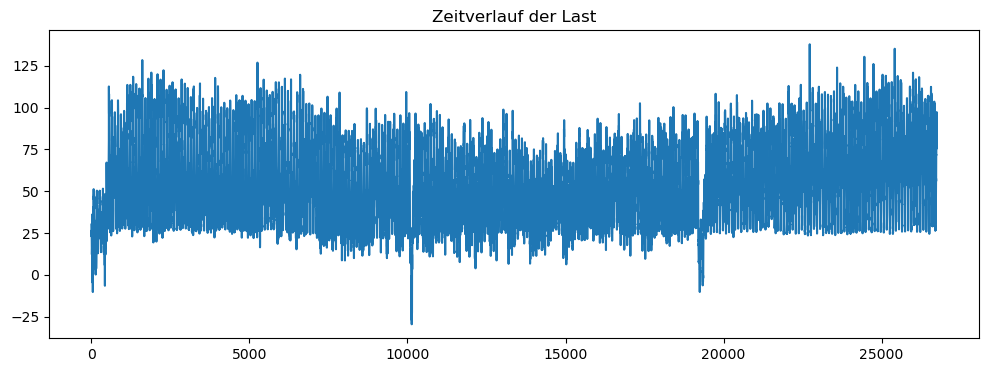

In [5]:
df["Nettolast_P_kW"].plot(figsize=(12, 4), title="Zeitverlauf der Last")


In [6]:
df.corr(numeric_only=True)["Nettolast_P_kW"].sort_values(ascending=False)


Nettolast_P_kW      1.000000
1-1:1290*255        0.826597
hour                0.567297
1-1:5290*255        0.566595
1-1:8290*255        0.534650
rre150h0            0.081803
weekday            -0.006296
1-1:7290*255       -0.010547
dkl010h0           -0.012011
fkl010h1           -0.018502
fkl010h0           -0.019579
is_weekend         -0.026213
1-1:6290*255       -0.146470
tre200h0           -0.168348
Nettolast_Q_kvar   -0.225185
gre000h0           -0.367674
1-1:2290*255       -0.380988
Name: Nettolast_P_kW, dtype: float64

<Axes: title={'center': 'Ø Last pro Wochentag'}, xlabel='weekday'>

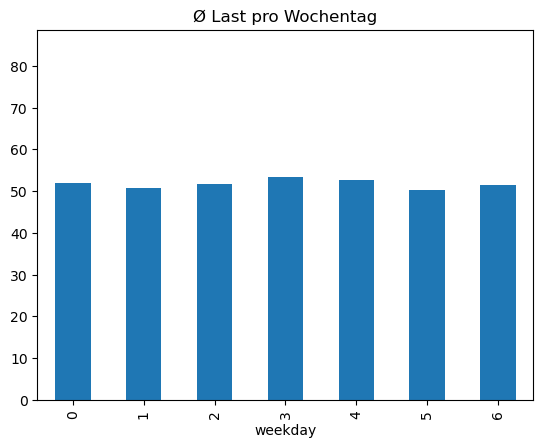

In [7]:
df.groupby("hour")["Nettolast_P_kW"].mean().plot(kind="bar", title="Ø Last pro Stunde")
df.groupby("weekday")["Nettolast_P_kW"].mean().plot(kind="bar", title="Ø Last pro Wochentag")


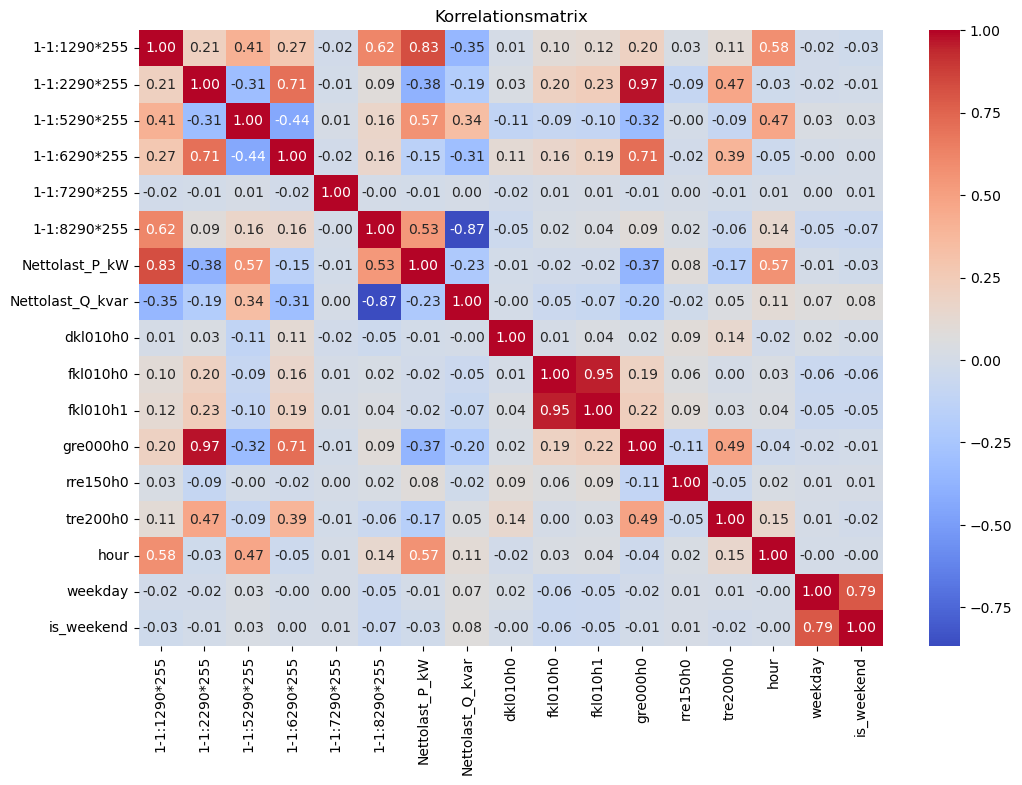

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Korrelationsmatrix")
plt.show()


<Axes: >

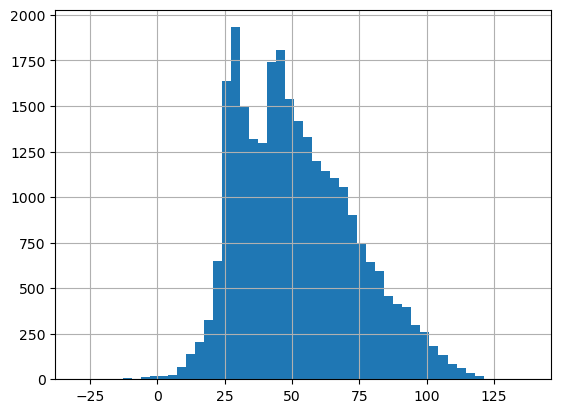

In [9]:
df["Nettolast_P_kW"].hist(bins=50)


In [20]:
import pandas as pd

# Load the uploaded CSV file
file_path = "../data/eda_b4s_clean.csv"
df = pd.read_csv(file_path)

# Display the first few rows and column names to understand the structure
df.head(), df.columns.tolist()


(                  time  1-1:1290*255  1-1:2290*255  1-1:5290*255  \
 0  2020-03-02 23:15:00         30014             0          2612   
 1  2020-03-02 23:30:00         27356             0          2538   
 2  2020-03-02 23:45:00         25930             0          2544   
 3  2020-03-03 00:00:00         24318             0          2432   
 4  2020-03-03 00:15:00         24300             0          2460   
 
    1-1:6290*255  1-1:7290*255  1-1:8290*255  Nettolast_P_kW  Nettolast_Q_kvar  \
 0             0             0          8200          30.014            -5.588   
 1             0             0          8322          27.356            -5.784   
 2             0             0          8302          25.930            -5.758   
 3             0             0          8296          24.318            -5.864   
 4             0             0          8082          24.300            -5.622   
 
    dkl010h0  fkl010h0  fkl010h1  gre000h0  rre150h0  tre200h0  hour  weekday  \
 0     24

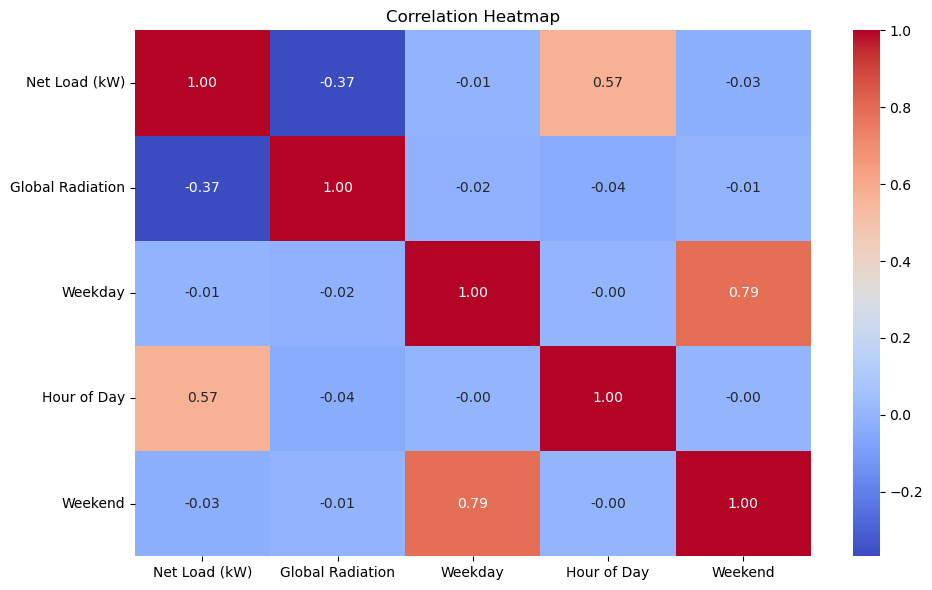

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Relevante Spalten extrahieren und umbenennen
df_heatmap = df[[
    'Nettolast_P_kW',
    'gre000h0',
    'weekday',
    'hour',
    'is_weekend'
]].rename(columns={
    'Nettolast_P_kW': 'Net Load (kW)',
    'gre000h0': 'Global Radiation',
    'weekday': 'Weekday',
    'hour': 'Hour of Day',
    'is_weekend': 'Weekend'
})

# Korrelationsmatrix berechnen
correlation_matrix = df_heatmap.corr()

# Heatmap zeichnen
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


In [22]:
# Features und Ziel definieren
features = [
    'Global Radiation', 'Hour of Day', 'Weekday', 'Weekend', 'Holiday'
]
target = 'Net Load (kW)'

# Eingabedaten vorbereiten
X = df.rename(columns={
    'Nettolast_P_kW': 'Net Load (kW)',
    'gre000h0': 'Global Radiation',
    'hour': 'Hour of Day',
    'weekday': 'Weekday',
    'is_weekend': 'Weekend'
})[features]

y = df['Nettolast_P_kW']


In [23]:
from sklearn.model_selection import train_test_split

# Split in Trainings- und Testdaten (z. B. 80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [9]:
from sklearn.linear_model import LinearRegression

# Modell initialisieren und trainieren
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


LinearRegression()

In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Modell initialisieren
rf = RandomForestRegressor(random_state=42)

# Hyperparameter definieren
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# GridSearchCV zur Hyperparameteroptimierung
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)

# Modell trainieren
grid_search.fit(X_train, y_train)

# Bestes Modell extrahieren
best_rf_model = grid_search.best_estimator_
# Vorhersagen auf den Testdaten
y_pred = best_rf_model.predict(X_test)      

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   1.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   1.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   1.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   1.5s
[CV] END ma

In [25]:
print("Beste Parameterkombination:")
print(grid_search.best_params_)


Beste Parameterkombination:
{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


In [26]:
print("Bestes Ergebnis (negativer MSE):")
print(grid_search.best_score_)


Bestes Ergebnis (negativer MSE):
-122.9922814607917


In [28]:
import pandas as pd

results_df = pd.DataFrame(grid_search.cv_results_)
# Wähle nur relevante Spalten aus
results_df = results_df[[
    'mean_test_score', 'std_test_score', 'params'
]]

# Bessere Übersicht: Sortieren nach Score (höherer negativer MSE = schlechter)
results_df['positive_mse'] = -results_df['mean_test_score']
results_df = results_df.sort_values('positive_mse')

# Ausgabe der Ergebnisse
print("Ergebnisse der Hyperparameteroptimierung:")
print(results_df.head(10))  # Zeige die besten 10 Ergebnisse an 


Ergebnisse der Hyperparameteroptimierung:
    mean_test_score  std_test_score  \
14      -122.992281        5.185667   
12      -122.998454        5.193368   
11      -123.003067        5.106590   
15      -123.012698        5.184972   
13      -123.028819        5.197043   
10      -123.042690        5.103881   
9       -123.115304        5.172220   
8       -123.161356        5.172479   
23      -130.007187        5.852310   
22      -130.151411        5.939411   

                                               params  positive_mse  
14  {'max_depth': 10, 'min_samples_leaf': 2, 'min_...    122.992281  
12  {'max_depth': 10, 'min_samples_leaf': 2, 'min_...    122.998454  
11  {'max_depth': 10, 'min_samples_leaf': 1, 'min_...    123.003067  
15  {'max_depth': 10, 'min_samples_leaf': 2, 'min_...    123.012698  
13  {'max_depth': 10, 'min_samples_leaf': 2, 'min_...    123.028819  
10  {'max_depth': 10, 'min_samples_leaf': 1, 'min_...    123.042690  
9   {'max_depth': 10, 'min_samples_lea

In [33]:
best_rf_model = grid_search.best_estimator_
# Vorhersagen auf den Testdaten
y_pred = best_rf_model.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score    
# MSE und R² berechnen
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")    

Mean Squared Error: 125.57
R² Score: 0.73


In [31]:
from sklearn.metrics import r2_score

# Vorhersage auf Testdaten
y_pred = best_rf_model.predict(X_test)

# R² berechnen
r2 = r2_score(y_test, y_pred)
print("R²-Score auf Testdaten:", r2)


R²-Score auf Testdaten: 0.7330369581860825


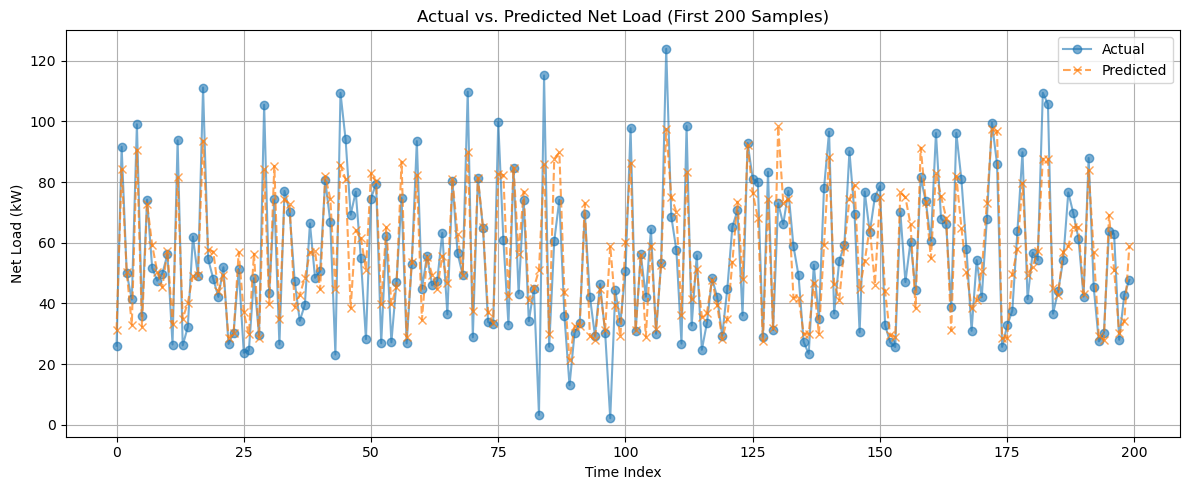

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(y_test.values[:200], label="Actual", marker='o', linestyle='-', alpha=0.6)
plt.plot(y_pred[:200], label="Predicted", marker='x', linestyle='--', alpha=0.7)
plt.xlabel("Time Index")
plt.ylabel("Net Load (kW)")
plt.title("Actual vs. Predicted Net Load (First 200 Samples)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


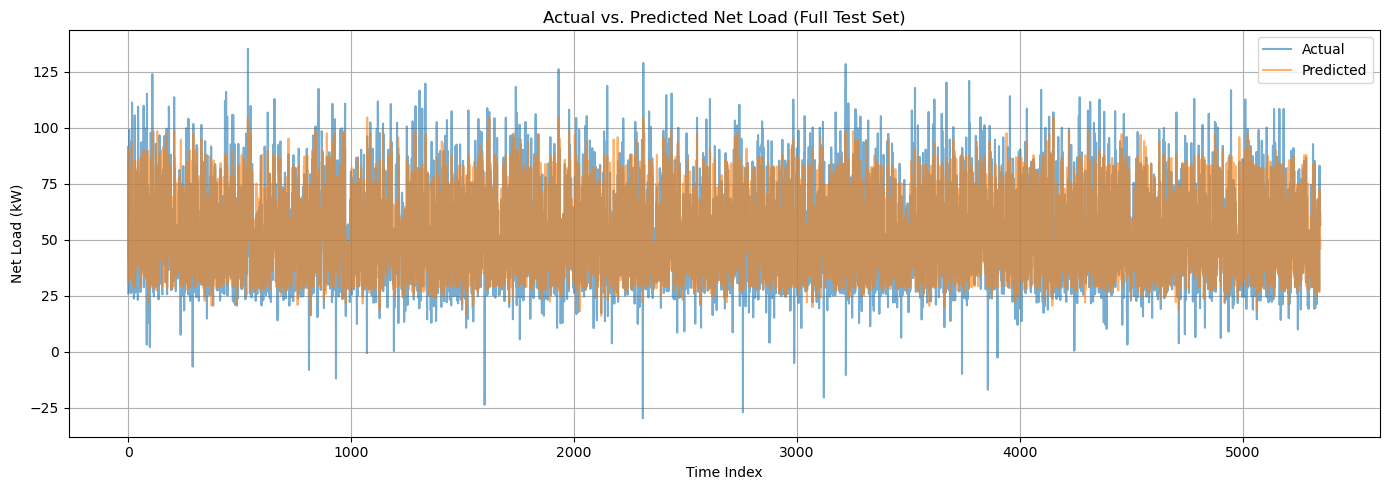

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))
plt.plot(y_test.values, label="Actual", alpha=0.6)
plt.plot(y_pred, label="Predicted", alpha=0.6)
plt.xlabel("Time Index")
plt.ylabel("Net Load (kW)")
plt.title("Actual vs. Predicted Net Load (Full Test Set)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Vorhersage auf Testdaten
y_pred = lr_model.predict(X_test)

# Bewertung
mae = mean_absolute_error(y_test, y_pred)  
rmse = np.sqrt(mean_squared_error(y_test, y_pred))                  # Mittlerer absoluter Fehler
    # Wurzel des mittleren quadratischen Fehlers
r2 = r2_score(y_test, y_pred)                                # Bestimmtheitsmaß

# Ausgabe
print(f"MAE: {mae:.2f} kW")
print(f"RMSE: {rmse:.2f} kW")
print(f"R²: {r2:.2f}")


MAE: 12.73 kW
RMSE: 16.23 kW
R²: 0.44


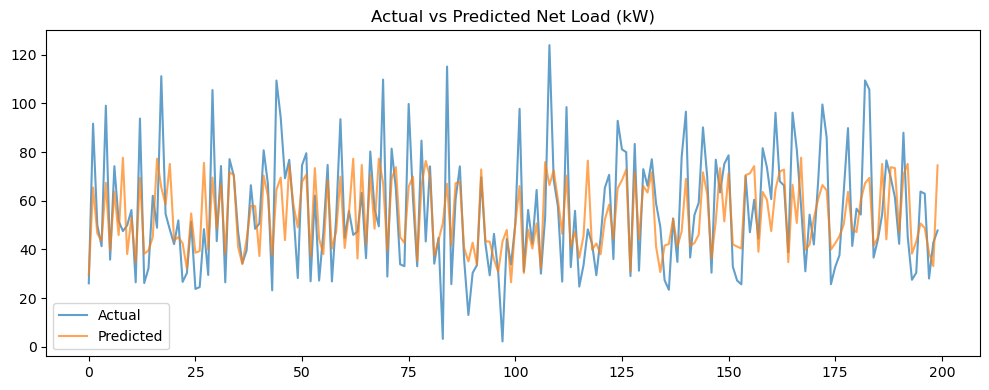

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.plot(y_test.values[:200], label="Actual", alpha=0.7)
plt.plot(y_pred[:200], label="Predicted", alpha=0.7)
plt.title("Actual vs Predicted Net Load (kW)")
plt.legend()
plt.tight_layout()
plt.show()
